# Marci: Marketing Analytics and ROI Calculator

[![Tests](https://github.com/yourusername/marci/workflows/Tests/badge.svg)](https://github.com/yourusername/marci/actions)
[![Python](https://img.shields.io/badge/python-3.8%2B-blue.svg)](https://www.python.org/downloads/)

**Marci** is a comprehensive Python package for marketing analytics, campaign optimization, and ROI calculations. It provides tools for simulating marketing campaigns, analyzing performance, and optimizing budget allocation across multiple channels.

## 🚀 Features

- 🎯 **Campaign Simulation**: Realistic campaign performance modeling with seasonality, conversion delays, and elasticity
- 📊 **Portfolio Optimization**: Multi-campaign budget allocation and performance analysis
- 📈 **Statistical Distributions**: Advanced probability distributions for modeling uncertainty
- 🔄 **Elasticity Analysis**: Marketing mix modeling and response curve analysis
- 📅 **Seasonality Modeling**: Time-series patterns and seasonal adjustments
- ⏱️ **Conversion Delay**: Realistic conversion timing modeling
- 📊 **Visualization**: Built-in plotting and charting capabilities

## 📦 Installation

```bash
pip install marci
```

## 🎯 Quick Start

Marci provides powerful tools for marketing analytics. Let's start with the basics!


## 🔧 Installation and Import

Install the package and import the main classes:


In [1]:
# Standard package import - how users will use it
import marci
from marci import Campaign, Portfolio

# Display available classes
print("✅ Marci package imported successfully!")
print("Available classes:", [attr for attr in dir(marci) if not attr.startswith("_")])


✅ Marci package imported successfully!
Available classes: ['Budgets', 'Campaign', 'Conversion_Delay', 'Distribution', 'Elasticity', 'Lognormal', 'PerformanceStats', 'Portfolio', 'Seasonality', 'antidiag_sums', 'budgets', 'campaigns', 'fmt', 'get_campaign_colors', 'portfolio', 'simulated_data', 'style', 'utils']


## 🎯 Single Campaign Example

Let's start with a comprehensive single campaign example that demonstrates all the key features of Marci:

### 📋 Campaign Parameters Explained:
- **`name`**: Campaign identifier
- **`start_date`**: Campaign start date
- **`duration`**: Campaign duration in days
- **`budget`**: Total campaign budget
- **`cpm`**: Cost per thousand impressions
- **`cvr`**: Conversion rate (probability of conversion)
- **`aov`**: Average order value
- **`cv`**: Coefficient of variation (volatility)
- **`seasonality_cv`**: Seasonality coefficient of variation
- **`conv_delay`**: Conversion delay probability
- **`conv_delay_duration`**: Conversion delay duration in days
- **`elasticity`**: Marketing elasticity coefficient
- **`is_organic`**: Whether this is an organic campaign


Simulating Campaign('Test Campaign', budget=$1,000, duration=90, exp_roas=100%, cv=10%)
group            meta              budget    sales           roas      
metric           name       kind     paid     paid    total  paid total
0       Test Campaign   Expected  $90,000  $90,000  $90,000  100%  100%
1       Test Campaign  Simulated  $91,046  $94,610  $94,610  104%  104%


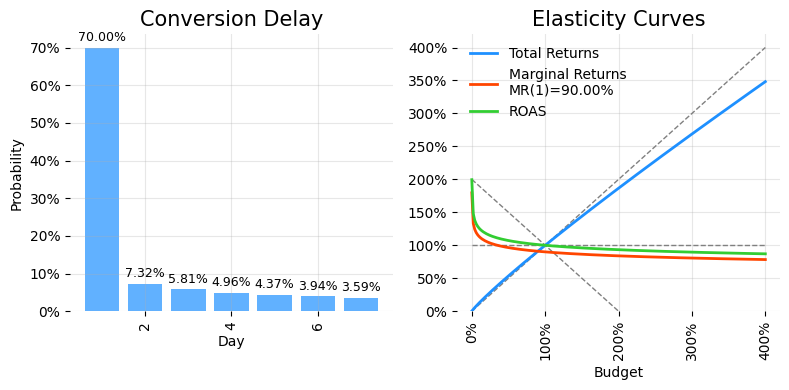

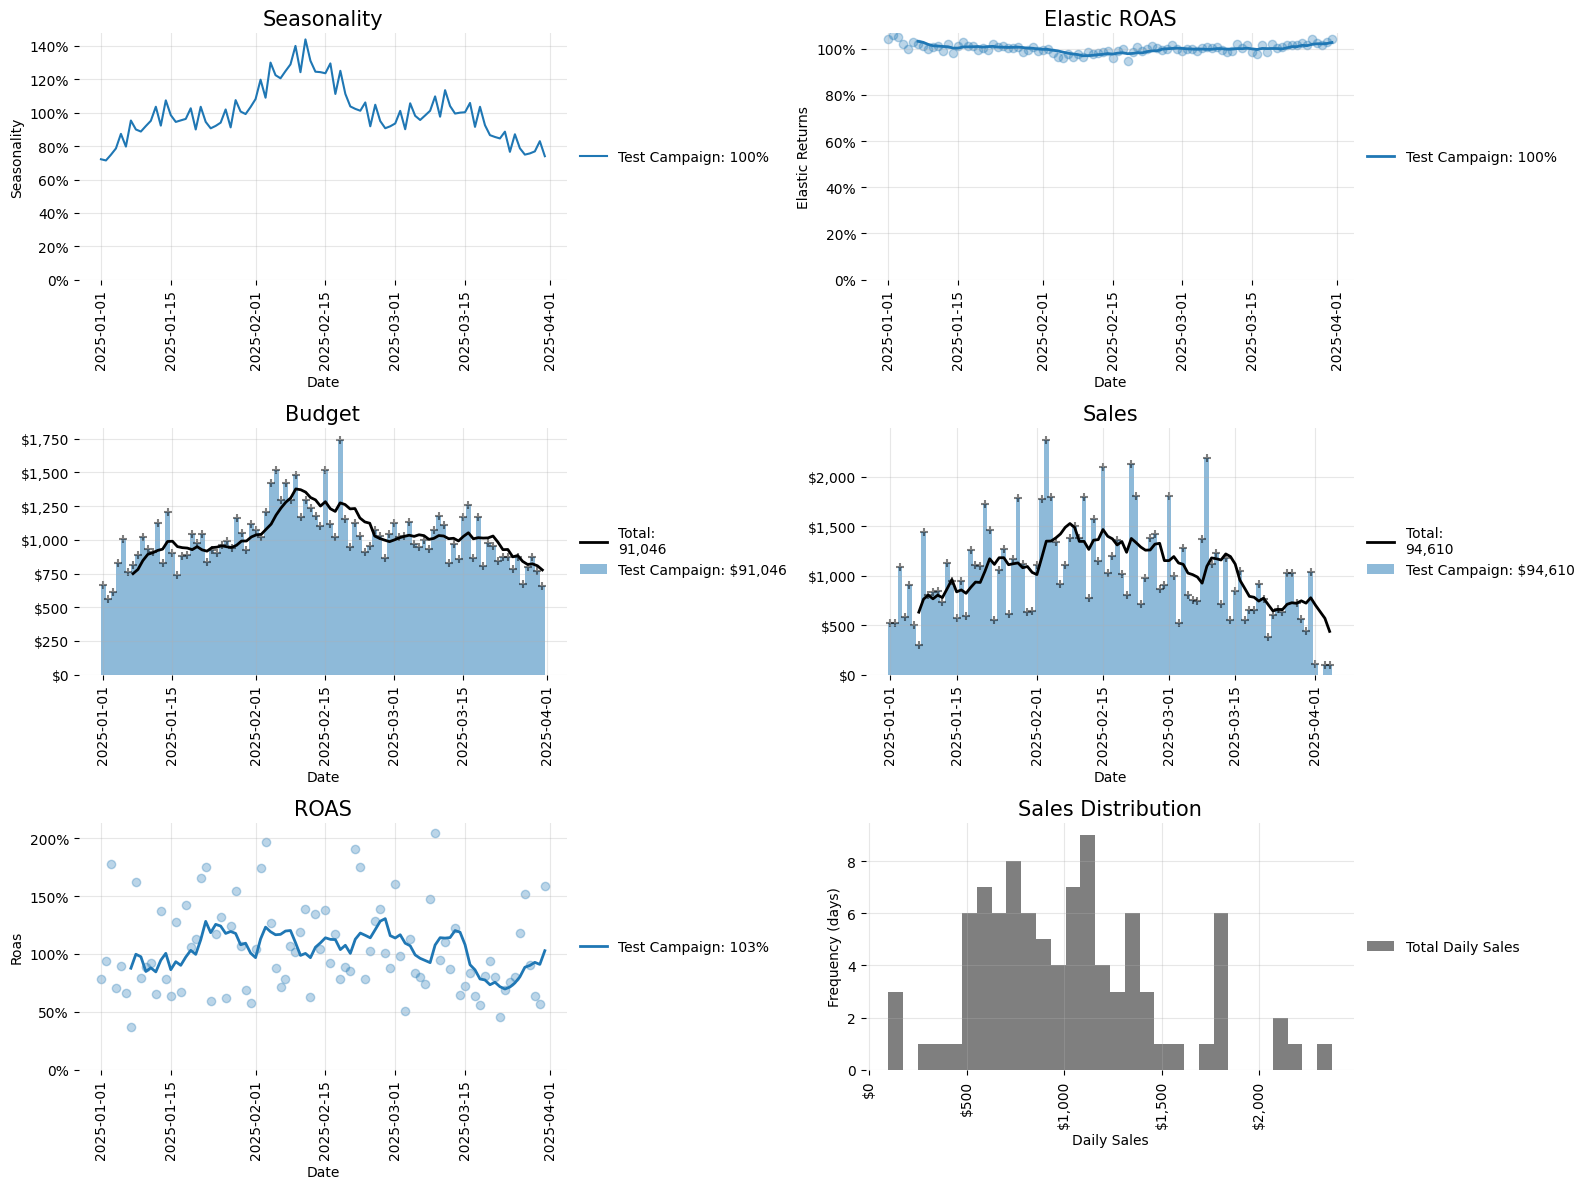

Simulation DataFrame (first 5 rows):
        date           name  seasonality    base       budget  elastic_budget  \
0 2025-01-01  Test Campaign     0.721462  1000.0   668.325502        0.668326   
1 2025-01-02  Test Campaign     0.714294  1000.0   557.522861        0.557523   
2 2025-01-03  Test Campaign     0.748401  1000.0   613.642970        0.613643   
3 2025-01-04  Test Campaign     0.786256  1000.0   829.453505        0.829454   
4 2025-01-05  Test Campaign     0.873588  1000.0  1005.396585        1.005397   

   elastic_returns     imps  convs        sales  is_organic      roas  
0         1.041121  57498.0    5.0   520.909905       False  0.779425  
1         1.060166  58206.0    5.0   525.244738       False  0.942104  
2         1.050046  61977.0    9.0  1093.033323       False  1.781220  
3         1.018875  97888.0    7.0   583.672613       False  0.703683  
4         0.999462  83738.0    8.0   904.478341       False  0.899623  

Aggregated DataFrame (first 5 rows):
Metric

In [2]:
C = Campaign(
    name="Test Campaign",
    start_date="2025-01-01",
    duration=90,
    budget=1000,
    cpm=10,
    cvr=1e-4,
    aov=100,
    cv=0.1,
    seasonality_cv=0.2,
    conv_delay=0.3,
    conv_delay_duration=7,
    elasticity=0.9,
    is_organic=False,
)

# Display campaign statistics
C.print_stats()

# Visualize elasticity and conversion delay effects
C.plot_elasticity_and_delay()

# Plot campaign performance over time
C.plot()

# Access simulation data
print("Simulation DataFrame (first 5 rows):")
print(C.sim_data.df.head())
print("\nAggregated DataFrame (first 5 rows):")
print(C.sim_data.agg_df.head())


## 📊 Portfolio Management

Now let's explore portfolio management with multiple campaigns. This example shows how to create and manage a portfolio of campaigns with different characteristics:

### 🏢 Portfolio Campaign Types:
- **Stable Organic**: Low volatility organic campaign
- **High Performance**: High conversion rate paid campaign
- **Low Performance**: Lower conversion rate paid campaign


Budgets('All Budgets', total=$3,000, {'High Performace': $1,000, 'Low Performance': $1,000, 'Stable Organic': $1,000})
Simulating Campaign('High Performace', budget=$1,000, duration=20, exp_roas=150%, cv=10%)
Simulating Campaign('Low Performance', budget=$1,000, duration=30, exp_roas=50%, cv=10%)
Simulating Campaign('Stable Organic', budget=$1,000, duration=90, exp_roas=100%, cv=0%)
group        meta              budget    sales           roas      
metric       name       kind     paid     paid     total paid total
0       Portfolio   Expected  $50,000  $45,000  $135,000  90%  270%
1       Portfolio  Simulated  $50,642  $44,853  $135,103  89%  267%


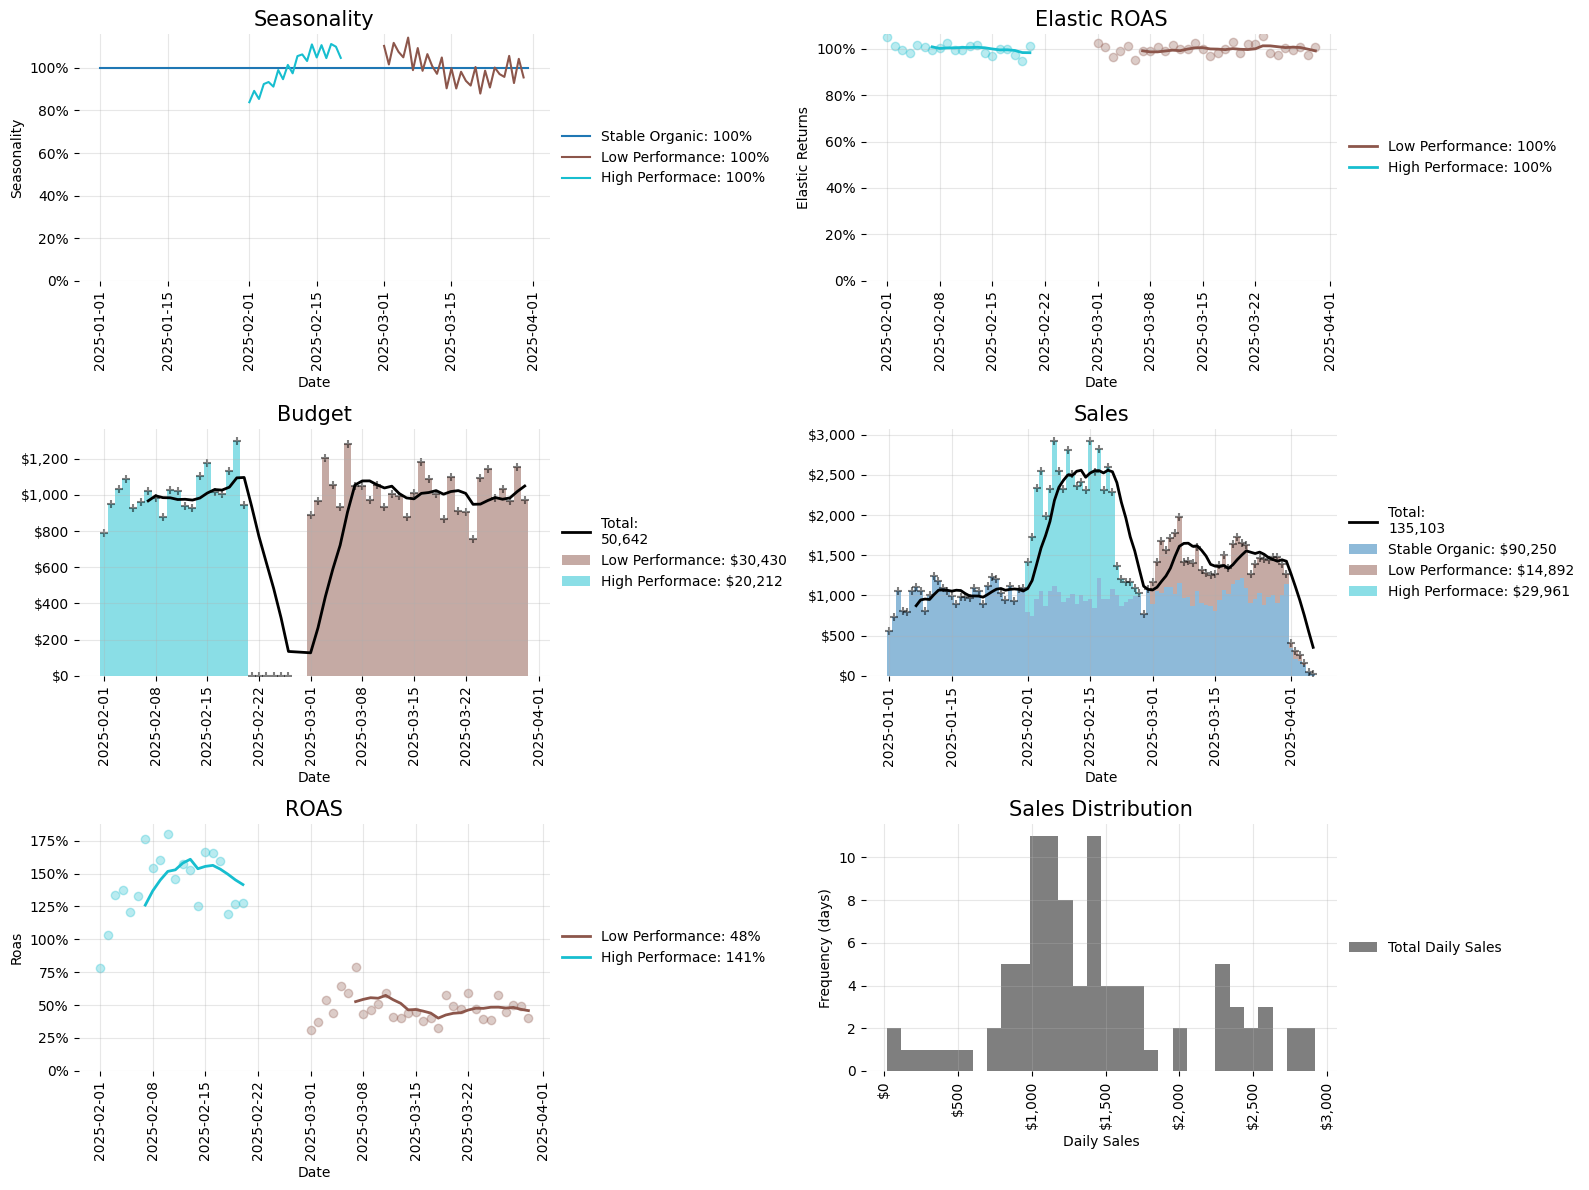

Portfolio Simulation DataFrame (first 5 rows):
        date            name  seasonality    base       budget  \
0 2025-01-01  Stable Organic          1.0  1000.0   999.999967   
1 2025-01-02  Stable Organic          1.0  1000.0   999.999711   
2 2025-01-03  Stable Organic          1.0  1000.0   999.998856   
3 2025-01-04  Stable Organic          1.0  1000.0  1000.001150   
4 2025-01-05  Stable Organic          1.0  1000.0  1000.000850   

   elastic_budget  elastic_returns      imps  convs        sales  is_organic  \
0        1.000000              1.0  100362.0   56.0   560.000035        True   
1        1.000000              1.0  100400.0   73.0   729.999105        True   
2        0.999999              1.0  100035.0  105.0  1050.001596        True   
3        1.000001              1.0   99690.0   81.0   810.000055        True   
4        1.000001              1.0   99915.0   80.0   800.000296        True   

       roas  
0  0.560000  
1  0.729999  
2  1.050003  
3  0.809999  
4  0.

In [3]:
campaigns = [
    Campaign(
        name="Stable Organic",
        start_date="2025-01-01",
        cv=0,
        seasonality_cv=0,
        duration=90,
        is_organic=True,
    ),
    Campaign(
        name="High Performace",
        cvr=0.0015,
        start_date="2025-02-01",
        duration=20,
    ),
    Campaign(
        name="Low Performance",
        cvr=0.0005,
        start_date="2025-03-01",
        duration=30,
    ),
]

P = Portfolio(campaigns)

# Display portfolio statistics
P.print_stats()

# Visualize portfolio performance
P.plot()

# Access simulation data
print("Portfolio Simulation DataFrame (first 5 rows):")
print(P.sim_data.df.head())
print("\nPortfolio Aggregated DataFrame (first 5 rows):")
print(P.sim_data.agg_df.head())


## 🎯 Advanced Portfolio Scenarios

This example demonstrates more complex portfolio scenarios with various campaign types and characteristics:

### 📈 Campaign Types in Advanced Portfolio:
- **Noisy Organic Trend**: Organic campaign with seasonal patterns
- **One Time Organic Spike**: Short-duration high-budget organic campaign
- **High Performance Non-Elastic**: High CVR but low elasticity
- **Medium Performance Elastic**: Balanced performance with good elasticity
- **Low Performance Elastic**: Lower CVR but responsive to budget changes


Budgets('All Budgets', total=$15,000, {'High Performace Non-Elastic': $1,000, 'Medium Performace Elastic': $1,000, 'Low Performance Elastic': $1,000, 'Noisy Organic Trend': $2,000, 'One Time Organic Spike': $10,000})
Simulating Campaign('High Performace Non-Elastic', budget=$1,000, duration=90, exp_roas=150%, cv=10%)
Simulating Campaign('Medium Performace Elastic', budget=$1,000, duration=90, exp_roas=100%, cv=10%)
Simulating Campaign('Low Performance Elastic', budget=$1,000, duration=90, exp_roas=50%, cv=10%)
Simulating Campaign('Noisy Organic Trend', budget=$2,000, duration=90, exp_roas=100%, cv=10%)
Simulating Campaign('One Time Organic Spike', budget=$10,000, duration=3, exp_roas=100%, cv=10%)
group        meta               budget     sales            roas      
metric       name       kind      paid      paid     total  paid total
0       Portfolio   Expected  $270,000  $270,000  $480,000  100%  178%
1       Portfolio  Simulated  $269,025  $271,638  $473,722  101%  176%


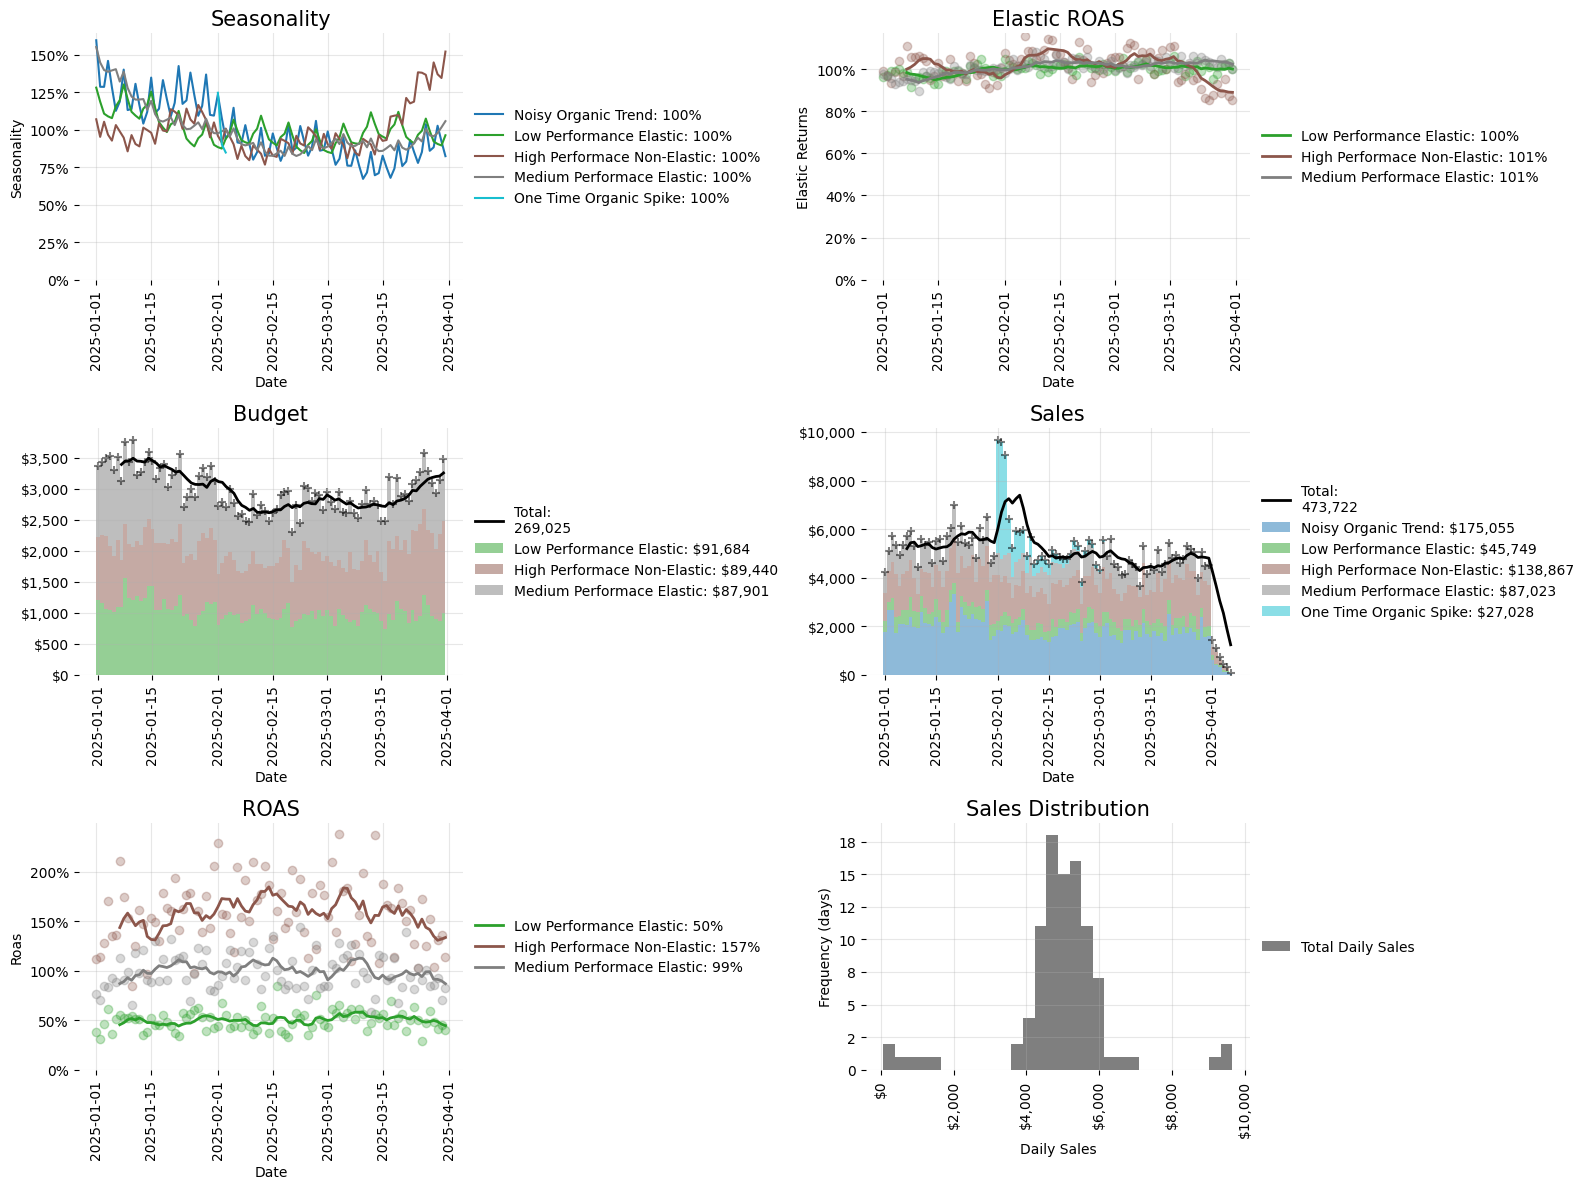

Advanced Portfolio Simulation DataFrame (first 5 rows):
        date                         name  seasonality    base       budget  \
0 2025-01-01  High Performace Non-Elastic     1.070488  1000.0  1026.643465   
1 2025-01-01      Low Performance Elastic     1.281612  1000.0  1198.446675   
2 2025-01-01    Medium Performace Elastic     1.552583  1000.0  1135.638100   
3 2025-01-01          Noisy Organic Trend     1.597714  2000.0  2713.797461   
4 2025-01-02  High Performace Non-Elastic     0.953048  1000.0  1093.085134   

   elastic_budget  elastic_returns      imps  convs        sales  is_organic  \
0        1.026643         0.989537  111983.0  113.0  1149.910791       False   
1        1.198447         0.964442  101021.0   44.0   456.837049       False   
2        1.135638         0.974882  113977.0   92.0   872.665627       False   
3        1.356899         0.940785  269918.0  186.0  1766.914483        True   
4        1.093085         0.965025  114501.0  151.0  1248.790741     

In [4]:
campaigns = [
    Campaign(
        name="Noisy Organic Trend",
        start_date="2025-01-01",
        duration=90,
        budget=2000,
        seasonality_cv=0.3,
        is_organic=True,
    ),
    Campaign(
        name="One Time Organic Spike",
        start_date="2025-02-01",
        duration=3,
        budget=10000,
        seasonality_cv=1,
        conv_delay=0.6,
        conv_delay_duration=28,
        is_organic=True,
    ),
    Campaign(
        name="High Performace Non-Elastic",
        start_date="2025-01-01",
        duration=90,
        budget=1000,
        cvr=0.0015,
        elasticity=0.6,
    ),
    Campaign(
        name="Medium Performace Elastic",
        start_date="2025-01-01",
        duration=90,
        budget=1000,
        cvr=0.001,
        elasticity=0.8,
    ),
    Campaign(
        name="Low Performance Elastic",
        start_date="2025-01-01",
        duration=90,
        budget=1000,
        cvr=0.0005,
        elasticity=0.8,
    ),
]

P = Portfolio(campaigns)

# Display portfolio statistics
P.print_stats()

# Visualize portfolio performance
P.plot()

# Access simulation data
print("Advanced Portfolio Simulation DataFrame (first 5 rows):")
print(P.sim_data.df.head())
print("\nAdvanced Portfolio Aggregated DataFrame (first 5 rows):")
print(P.sim_data.agg_df.head())


## 💰 Budget Optimization

One of Marci's most powerful features is budget optimization. Let's explore how to optimize budget allocation across campaigns:

### 🎯 Optimization Process:
1. **Default Budgets**: Start with current budget allocation
2. **Find Optimal**: Use Marci's optimization algorithm to find the best allocation
3. **Simulate Results**: Run simulations with optimized budgets
4. **Compare Performance**: Analyze the improvement in ROI and sales


Default Budgets:
Budgets('Default Budget', total=$3,000, {'High Performace Non-Elastic': $1,000, 'Medium Performace Elastic': $1,000, 'Low Performance Elastic': $1,000})

Optimal Budgets (Total: $3,000):
Budgets('Optimal Budget', total=$3,000, {'High Performace Non-Elastic': $1,577, 'Medium Performace Elastic': $1,380, 'Low Performance Elastic': $43})
Budgets('Optimal Budget', total=$15,000, {'High Performace Non-Elastic': $1,577, 'Medium Performace Elastic': $1,380, 'Low Performance Elastic': $43, 'Noisy Organic Trend': $2,000, 'One Time Organic Spike': $10,000})
Simulating Campaign('High Performace Non-Elastic', budget=$1,000, duration=90, exp_roas=150%, cv=10%)
Simulating Campaign('Medium Performace Elastic', budget=$1,000, duration=90, exp_roas=100%, cv=10%)
Simulating Campaign('Low Performance Elastic', budget=$1,000, duration=90, exp_roas=50%, cv=10%)
Simulating Campaign('Noisy Organic Trend', budget=$2,000, duration=90, exp_roas=100%, cv=10%)
Simulating Campaign('One Time Organi

group        meta               budget     sales            roas      
metric       name       kind      paid      paid     total  paid total
0       Portfolio   Expected  $270,000  $297,515  $507,515  110%  188%
1       Portfolio  Simulated  $268,393  $296,059  $499,360  110%  186%


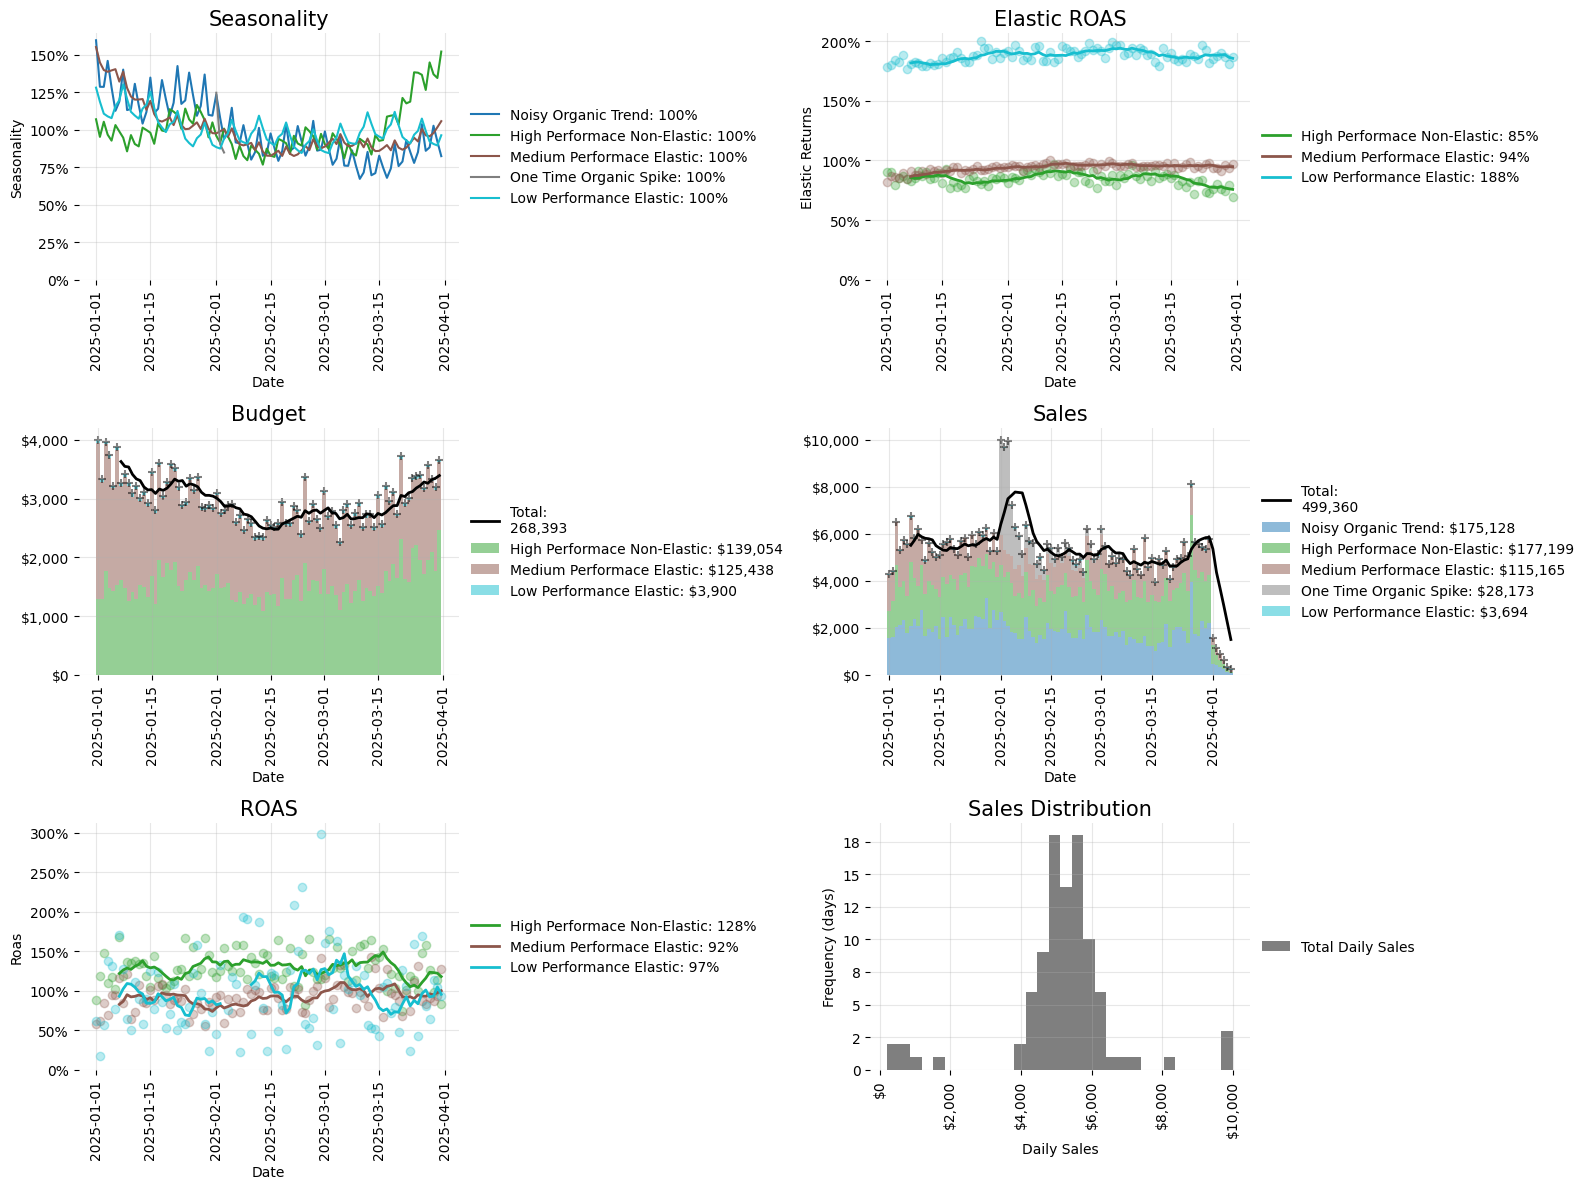

In [5]:
# Get default budget allocation
default_budgets = P.budgets
print("Default Budgets:")
print(default_budgets)

# Find optimal budget allocation with $3,000 total budget
optimal_budgets = P.find_optimal_budgets(3000)
print("\nOptimal Budgets (Total: $3,000):")
print(optimal_budgets)

# Simulate outcomes with optimal budgets
P.sim_outcomes(optimal_budgets)

# Display performance statistics with optimized budgets
P.print_stats(optimal_budgets)

# Visualize the optimized portfolio performance
P.plot()


## 🚀 High Budget Optimization

Let's explore what happens when we have a much larger budget to work with. This demonstrates how Marci scales with different budget constraints:

### 💡 Key Insights:
- **Elasticity Matters**: Campaigns with higher elasticity get more budget allocation
- **Diminishing Returns**: Some campaigns may receive minimal allocation due to poor performance
- **ROI Optimization**: The algorithm maximizes overall portfolio ROI


Default Budgets:
Budgets('Default Budget', total=$3,000, {'High Performace Non-Elastic': $1,000, 'Medium Performace Elastic': $1,000, 'Low Performance Elastic': $1,000})

Optimal Budgets (Total: $30,000):
Budgets('Optimal Budget', total=$30,000, {'High Performace Non-Elastic': $6,421, 'Medium Performace Elastic': $22,875, 'Low Performance Elastic': $704})
Budgets('Optimal Budget', total=$42,000, {'High Performace Non-Elastic': $6,421, 'Medium Performace Elastic': $22,875, 'Low Performance Elastic': $704, 'Noisy Organic Trend': $2,000, 'One Time Organic Spike': $10,000})
Simulating Campaign('High Performace Non-Elastic', budget=$1,000, duration=90, exp_roas=150%, cv=10%)
Simulating Campaign('Medium Performace Elastic', budget=$1,000, duration=90, exp_roas=100%, cv=10%)
Simulating Campaign('Low Performance Elastic', budget=$1,000, duration=90, exp_roas=50%, cv=10%)
Simulating Campaign('Noisy Organic Trend', budget=$2,000, duration=90, exp_roas=100%, cv=10%)
Simulating Campaign('One Time 

Simulating Campaign('Noisy Organic Trend', budget=$2,000, duration=90, exp_roas=100%, cv=10%)
Simulating Campaign('One Time Organic Spike', budget=$10,000, duration=3, exp_roas=100%, cv=10%)
group        meta                 budget       sales              roas      
metric       name       kind        paid        paid       total  paid total
0       Portfolio   Expected    $270,000  $1,546,840  $1,756,840  573%  651%
1       Portfolio  Simulated  $2,718,265  $1,495,241  $1,706,946   55%   63%


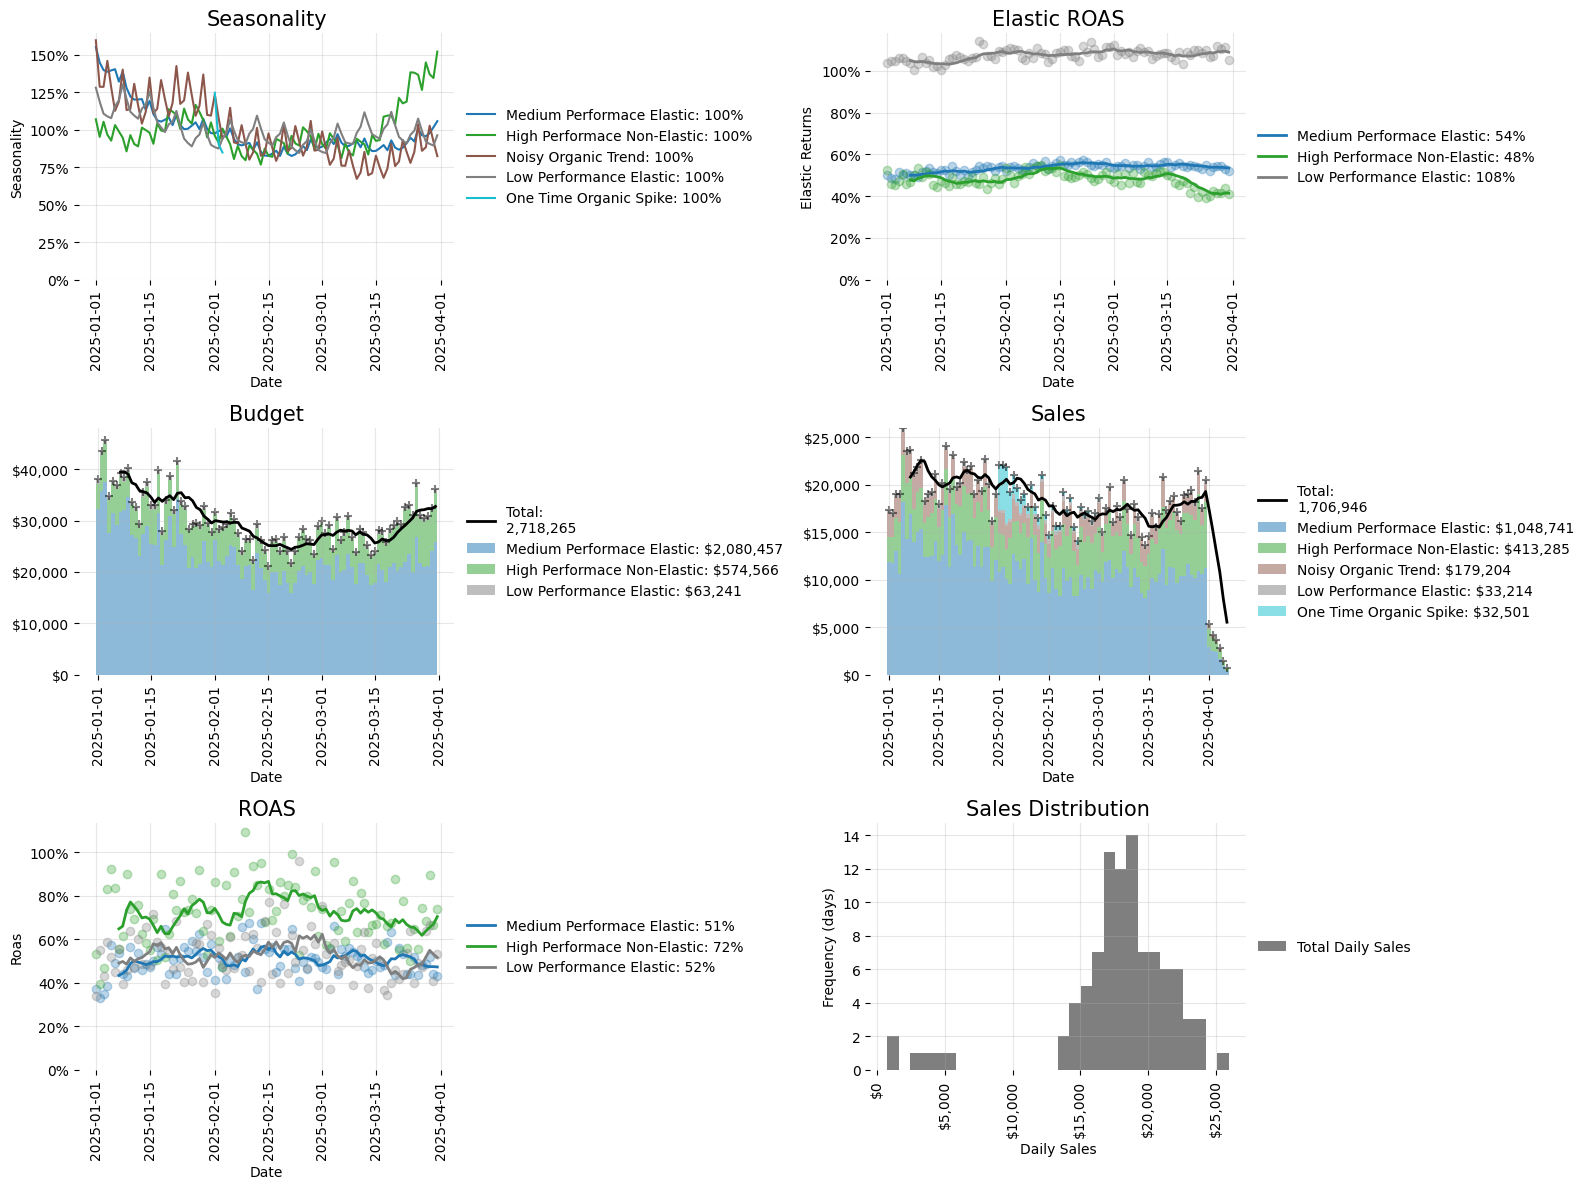

In [6]:
# Get default budget allocation
default_budgets = P.budgets
print("Default Budgets:")
print(default_budgets)

# Find optimal budget allocation with $30,000 total budget
optimal_budgets = P.find_optimal_budgets(30000)
print("\nOptimal Budgets (Total: $30,000):")
print(optimal_budgets)

# Simulate outcomes with high budget optimization
P.sim_outcomes(optimal_budgets)

# Display performance statistics with high budget optimization
P.print_stats(optimal_budgets)

# Visualize the high-budget optimized portfolio performance
P.plot()


## 📊 Understanding the Results

### 🎯 Key Metrics Explained:

**Campaign Performance Metrics:**
- **Expected ROAS**: Expected return on ad spend
- **Simulated ROAS**: Actual simulated performance
- **Total Sales**: Combined organic and paid sales
- **Budget Allocation**: How budget is distributed across campaigns

**Portfolio Optimization Insights:**
- **Elasticity Impact**: Higher elasticity campaigns receive more budget
- **Performance Scaling**: Better performing campaigns get priority
- **ROI Maximization**: Algorithm optimizes for maximum overall return

### 📈 Visualization Features:
- **Timeline Plots**: Show performance over time
- **Elasticity Curves**: Demonstrate response to budget changes
- **Conversion Delay**: Show realistic conversion timing
- **Seasonality Patterns**: Display seasonal variations


## 🔧 Advanced Features

### 🎯 Campaign Types and Use Cases:

**Organic Campaigns:**
- Set `is_organic=True`
- No CPM or CVR required
- Can have seasonality and conversion delays
- Represent organic traffic and brand awareness

**Paid Campaigns:**
- Require CPM, CVR, and AOV parameters
- Can have elasticity for budget optimization
- Support various performance characteristics
- Ideal for paid advertising channels

### 📊 Statistical Modeling:

**Uncertainty Modeling:**
- **Coefficient of Variation (CV)**: Controls performance volatility
- **Seasonality CV**: Models seasonal patterns and trends
- **Conversion Delay**: Realistic conversion timing
- **Elasticity**: Response to budget changes

**Distribution Support:**
- Lognormal distributions for realistic performance modeling
- Poisson processes for conversion events
- Beta distributions for conversion rates
- Combined distributions for complex scenarios


## 🚀 Getting Started with Your Own Data

### 📋 Step-by-Step Guide:

1. **Define Your Campaigns:**
   ```python
   campaigns = [
       Campaign(name="Google Ads", cpm=20, cvr=0.001, aov=100, budget=5000),
       Campaign(name="Facebook", cpm=15, cvr=0.0008, aov=80, budget=3000),
       Campaign(name="Organic", is_organic=True, budget=2000),
   ]
   ```

2. **Create Your Portfolio:**
   ```python
   portfolio = Portfolio(campaigns)
   ```

3. **Analyze Performance:**
   ```python
   portfolio.print_stats()
   portfolio.plot()
   ```

4. **Optimize Budgets:**
   ```python
   optimal = portfolio.find_optimal_budgets(10000)
   portfolio.sim_outcomes(optimal)
   ```

### 💡 Pro Tips:
- Start with simple campaigns and gradually add complexity
- Use realistic parameters based on your historical data
- Experiment with different elasticity values
- Consider seasonality for time-sensitive campaigns
- Use conversion delays for more realistic modeling


## 📚 API Reference

### 🎯 Core Classes:

**Campaign:**
- `Campaign(name, start_date, duration, budget, cpm, cvr, aov, cv, seasonality_cv, conv_delay, conv_delay_duration, elasticity, is_organic)`
- `print_stats()`: Display campaign performance statistics
- `plot()`: Visualize campaign performance
- `plot_elasticity_and_delay()`: Show elasticity and conversion delay effects
- `sim_data`: Access simulation data

**Portfolio:**
- `Portfolio(campaigns)`: Create portfolio from list of campaigns
- `print_stats(budgets=None)`: Display portfolio statistics
- `plot()`: Visualize portfolio performance
- `find_optimal_budgets(total_budget)`: Find optimal budget allocation
- `sim_outcomes(budgets=None)`: Run simulations with given budgets
- `sim_data`: Access simulation data

### 📊 Data Structures:

**Simulation Data (`sim_data`):**
- `df`: Detailed daily performance data
- `agg_df`: Aggregated performance metrics

**Budget Objects:**
- `total_budget`: Total budget amount
- `campaign_budgets`: Dictionary of campaign-specific budgets


## 🤝 Contributing

We welcome contributions! Please see our [Contributing Guidelines](CONTRIBUTING.md) for details.

### 🐛 Reporting Issues
If you find a bug or have a feature request, please open an issue on GitHub.

### 📝 Documentation
Help us improve the documentation by submitting pull requests or suggesting improvements.



## 🙏 Acknowledgments

Thanks to all contributors and the open-source community for making this project possible!

---

**Happy Marketing Analytics! 🚀📊**
